<a href="https://colab.research.google.com/github/JPaschals/CV/blob/main/Clustering_Analysis_of_Smart_Contract_Risk_tags.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering Analysis of Smart Contracts**
This interactive notekbook is about clustering smart contracts based on risk tags! This Colab notebook shows the process of applying Hierarchical clustering to a dataset of smart contracts; By selecting and uploading data, selecting features, implementing clustering, visualizing the results, and interpreting these findings to gain insights into smart contract vulnerabilities.

# Goals:

1. Understand and implement Hierarchical clustering.
Visualize clustering results to interpret data.

2. Experiment with other clustering algorithms or parameters to see if finer or different cluster distinctions emerge.


**Getting Google Colab Prepared**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Uploading Dataset To Google Drive**

In [33]:
from google.colab import files
uploaded = files.upload()


Saving risk_data.xlsx to risk_data (2).xlsx


**Import Library**

In [42]:
# Import necessary Python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import fcluster

print("Libraries imported successfully!")


# Display plots inline
%matplotlib inline


Libraries imported successfully!


**Loading The Dataset**

In [94]:
# Uploading the dataset

data_set = pd.read_excel("risk_data.xlsx")

# Display the first 10 rows

data_set.head(10)

,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,0xAb5801a7D398351b8bE11C439e05C5B3259ae9B,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,False,False,True,True,False,...,False,True,False,True,False,False,True,False,True,Summary/rationale of risk tags marked true: Th...
2,Data Analytics,0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db,https://stackoverflow.com/questions/71115106/s...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,False,True,False,...,False,True,False,True,False,False,False,True,True,NaN
3,Data Analytics,0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,True,False,False,False,True,...,False,True,False,False,True,True,False,False,True,NaN
4,Data Analytics,0x617F2E2fD72FD9D5503197092aC168c91465E7f2,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,True,False,True,...,False,False,True,True,False,True,False,False,True,The smart contract is marked with risks such a...
5,Data Analytics,0x3f5CE5FBFe3E9af3971dD833D26bA9b5C936f0bE,https://bloxy.info/address/0x3f5ce5fbfe3e9af39...,https://ethplorer.io/address/0x3f5ce5fbfe3e9af...,Ethereum,True,False,False,True,False,...,False,True,False,True,False,True,False,False,False,The smart contract is marked with risks such a...
6,Data Analytics,0x1aE0EA34a72D944a8C7603FfB3eC30a6669E454C,https://forum.openzeppelin.com/t/make-eth-tran...,https://gist.github.com/qope/0c82d0a2c2e0ac5ab...,Ethereum,True,False,False,True,False,...,False,True,False,True,True,False,False,True,False,The smart contract is marked with risks such a...
7,Data Analytics,0x4E984938A8d2C2c923D0dA80A950c8b661F29E02,https://studygroup.moralis.io/t/project-multis...,https://testnet.bscscan.com/token/0x353224fa5b...,Ethereum,False,True,False,True,False,...,False,False,True,False,True,False,True,False,False,The smart contract is marked with risks such a...
8,Data Analytics,0x90e63c3d53E0Ea496845b7a03ec7548B70014A91,https://dapp-world.com/smartbook/introduction-...,https://gist.github.com/medvedev1088?direction...,Ethereum,True,False,True,False,False,...,True,False,False,False,True,False,True,False,False,The smart contract is marked with risks such a...
9,Data Analytics,0xCd5fE23C85820F7B72D0926FC9b05b43E359b7ee,https://chainsecurity.com/smart-contract-audit...,https://chainsecurity.com/security-audit/maker...,Ethereum,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Audit Overview: ChainSecurity conducted the au...


# **Feature Selection**
Feature selection is crucial in any machine learning task. For clustering smart contracts, we select features that represent different risk tags effectively. This might include features like transaction frequency, error rates, or specific security vulnerabilities.

Below, we select a hypothetical set of features. For simplicity and effective visualization, we will select just three binary risk tags that had high correlation in the previous analysis. Adjust the features according to your dataset and analysis needs.

I selected these 3 features ( 'hidden_owner', 'Is_honeypot', 'exploitation') then another 4 features that had high correlation ( 'slippage_modifiable', 'anti_whale_modifiable', 'buy_tax', 'sell_tax')

In [96]:
# Show the available columns for feature selection

data_set.columns


Index(['project_name', 'Smart contract address', 'Blog post link',
       'Audit website', 'Chain', 'Is_closed_source', 'hidden_owner',
       'anti_whale_modifiable', 'Is_anti_whale', 'Is_honeypot', 'buy_tax',
       'sell_tax', 'slippage_modifiable', 'Is_blacklisted',
       'can_take_back_ownership', 'owner_change_balance', 'is_airdrop_scam',
       'selfdestruct', 'trust_list', 'is_whitelisted', 'is_fake_token',
       'illegal_unicode', 'exploitation', 'bad_contract',
       'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths',
       'Summary/rationale of risk tags marked true'],
      dtype='object')

Performing Correlation Analysis to see risks tags with high correlation vslues.

In [97]:
risk_columns = ['Is_closed_source', 'hidden_owner', 'anti_whale_modifiable',
       'Is_anti_whale', 'Is_honeypot', 'buy_tax', 'sell_tax',
       'slippage_modifiable', 'Is_blacklisted', 'can_take_back_ownership',
       'owner_change_balance', 'is_airdrop_scam', 'selfdestruct', 'trust_list',
       'is_whitelisted', 'is_fake_token', 'illegal_unicode', 'exploitation',
       'bad_contract', 'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths']

Defining Phi Coeficient for Two Variables

In [98]:
# To calculate the Phi coefficient, which is suitable for pairs of binary variables,
# we first need to establish a function that can handle this calculation:
!pip install scipy
import scipy.stats # Import the scipy.stats module

def phi_coefficient(x, y):
    """Calculate the Phi coefficient for two binary variables."""
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    # Calculate the phi coefficient from the contingency table
    chi2 = scipy.stats.chi2_contingency(contingency_table, correction=False)[0]
    n = np.sum(np.sum(contingency_table))
    phi = np.sqrt(chi2 / n)
    return phi



In [100]:
risk_data = data_set[risk_columns]

# Create a DataFrame to store Phi coefficients
phi_matrix = pd.DataFrame(index=risk_data.columns, columns=risk_data.columns)

# Calculate Phi coefficient for each pair of binary variables
for var1 in risk_data.columns:
    for var2 in risk_data.columns:
        phi_matrix.loc[var1, var2] = phi_coefficient(risk_data[var1], risk_data[var2])

print("Phi coefficients calculated for all pairs of variables:")
phi_matrix

Phi coefficients calculated for all pairs of variables:


,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,buy_tax,sell_tax,slippage_modifiable,Is_blacklisted,can_take_back_ownership,...,centralized_risk_medium,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths
Is_closed_source,1.0,0.377241,0.330545,0.295222,0.378356,0.325367,0.380376,0.392646,0.350922,0.268073,...,0.154701,0.210932,0.188913,0.353457,0.141124,0.258405,0.267738,0.341803,0.368141,0.282918
hidden_owner,0.377241,1.0,0.396169,0.35796,0.318871,0.476409,0.441975,0.400521,0.30169,0.361349,...,0.207843,0.32317,0.179091,0.295992,0.138936,0.234851,0.259852,0.328749,0.299391,0.206395
anti_whale_modifiable,0.330545,0.396169,1.0,0.522184,0.430144,0.467261,0.508889,0.604309,0.343386,0.337212,...,0.234878,0.343256,0.151742,0.367221,0.216158,0.290703,0.30709,0.391393,0.396996,0.324884
Is_anti_whale,0.295222,0.35796,0.522184,1.0,0.361724,0.504441,0.485596,0.480527,0.345546,0.271046,...,0.214742,0.274977,0.214919,0.327664,0.163063,0.363041,0.270344,0.344022,0.380936,0.304734
Is_honeypot,0.378356,0.318871,0.430144,0.361724,1.0,0.385562,0.42062,0.382178,0.473817,0.275998,...,0.19862,0.220442,0.229566,0.353648,0.200276,0.401028,0.328827,0.457276,0.436948,0.382178
buy_tax,0.325367,0.476409,0.467261,0.504441,0.385562,1.0,0.706026,0.468933,0.342314,0.344645,...,0.271892,0.306085,0.178313,0.303088,0.188246,0.359557,0.277935,0.377879,0.425561,0.327965
sell_tax,0.380376,0.441975,0.508889,0.485596,0.42062,0.706026,1.0,0.466078,0.379094,0.274693,...,0.309845,0.325616,0.204843,0.332492,0.199511,0.339642,0.334513,0.35248,0.430177,0.307444
slippage_modifiable,0.392646,0.400521,0.604309,0.480527,0.382178,0.468933,0.466078,1.0,0.315123,0.352786,...,0.233869,0.307745,0.204737,0.378341,0.217158,0.321931,0.351499,0.354841,0.431227,0.316176
Is_blacklisted,0.350922,0.30169,0.343386,0.345546,0.473817,0.342314,0.379094,0.315123,1.0,0.25251,...,0.151716,0.32934,0.165155,0.355839,0.204795,0.317108,0.273813,0.394809,0.455437,0.325302
can_take_back_ownership,0.268073,0.361349,0.337212,0.271046,0.275998,0.344645,0.274693,0.352786,0.25251,1.0,...,0.250195,0.353414,0.166029,0.269045,0.163273,0.314297,0.233799,0.367523,0.311373,0.234152


**Visualizing Correlation Heatmap**

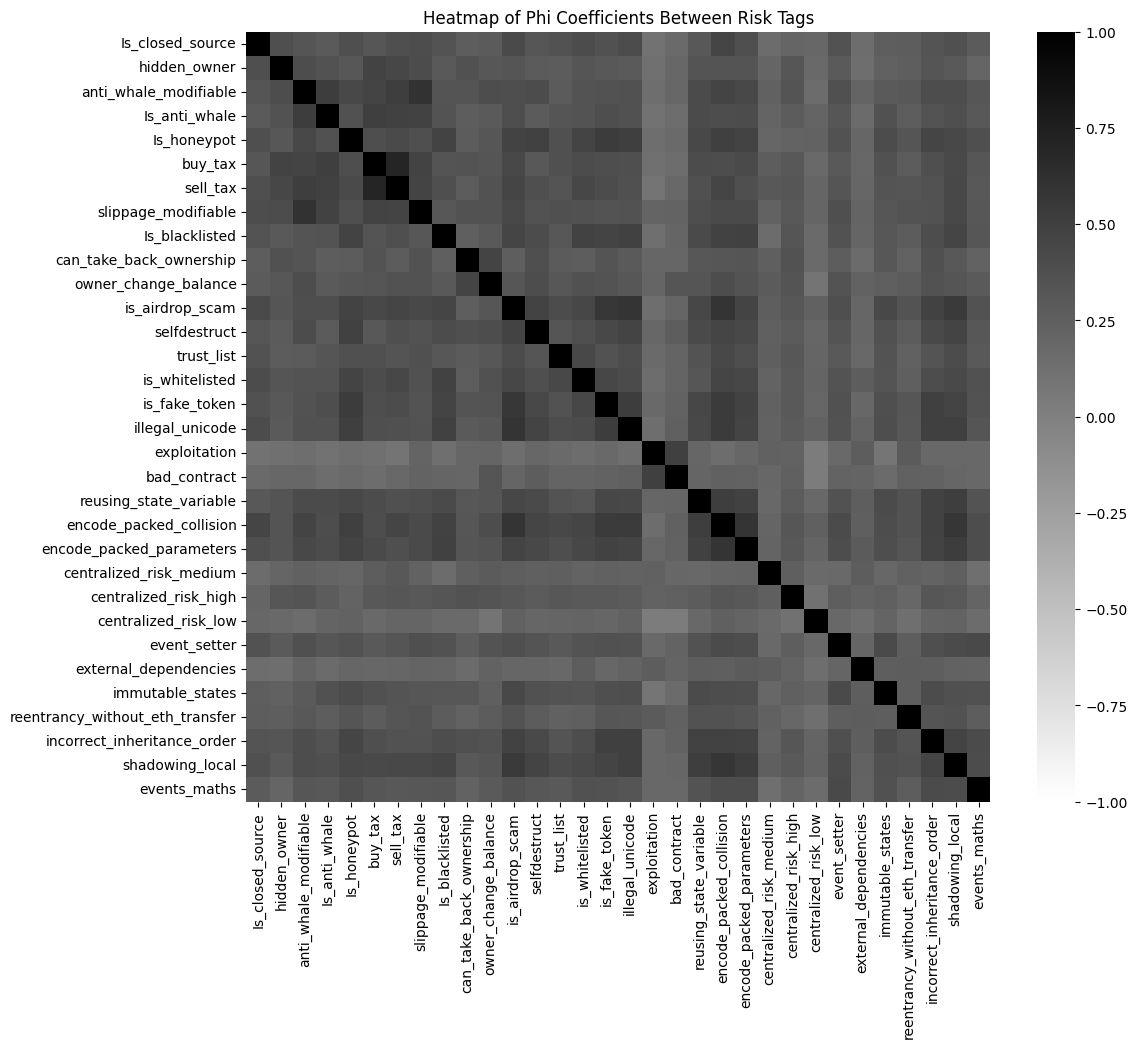

In [101]:
# Setting the size of the plot
plt.figure(figsize=(12, 10))

# Creating a heatmap
sns.heatmap(phi_matrix.astype(float), annot=False, fmt=".2f", cmap='binary', vmin=-1, vmax=1)
plt.title('Heatmap of Phi Coefficients Between Risk Tags')
plt.show()

**Selecting 3 Features for Cluster Analysis**


feature_1 = 'hidden_owner'

feature_2 = 'Is_honeypot'

feature_3 = 'exploitation'



In [103]:
data_new = data_set.copy()

# Assuming the dataset has multiple features, we select a few relevant ones
feature_1 = 'hidden_owner'
feature_2 = 'Is_honeypot'
feature_3 = 'exploitation'
selected_features = data_set[[feature_1, feature_2,feature_3]].replace({True:1, False:0})
print("Features selected for clustering:")

print(selected_features.head())

Features selected for clustering:
   hidden_owner  Is_honeypot  exploitation
0             0            0             1
1             0            0             0
2             0            0             1
3             0            1             1
4             0            1             1


**Applying Clustering**

Hierarchical Clustering with Jaccard Distance
In this section of the notebook, I will apply hierarchical clustering to the dataset using Jaccard distance. This method is particularly effective for datasets with binary attributes, like this, as it measures the dissimilarity between sample sets.

Compute Jaccard Distance
Compute the pairwise Jaccard distance between observations. Jaccard distance is a measure of how dissimilar two sets are, ranging from 0 (identical) to 1 (no common elements).

**Jaccard Distance**

In [104]:
from scipy.spatial.distance import pdist, squareform

# Assuming 'selected_features' is your DataFrame with binary data
distance_matrix = pdist(selected_features, 'jaccard')
distance_square_matrix = squareform(distance_matrix)  # Convert to square matrix

**Performing Hierarchical Clustering**

Using the complete linkage method, I performed hierarchical clustering. Complete linkage considers the maximum distance between observations in two clusters.

In [105]:
import scipy.cluster.hierarchy as sch

# Create linkage matrix
linkage_matrix = sch.linkage(distance_matrix, method='ward')



**Linkage Matrix**

In [106]:
linkage_matrix

array([[0.00000000e+00, 2.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 5.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [9.00000000e+00, 1.09300000e+03, 0.00000000e+00, 3.00000000e+00],
       ...,
       [2.17900000e+03, 2.18100000e+03, 6.06629803e+00, 2.09000000e+02],
       [2.02900000e+03, 2.18200000e+03, 1.06143505e+01, 5.58000000e+02],
       [2.17700000e+03, 2.18300000e+03, 2.13354187e+01, 1.09300000e+03]])

**Plotting the Dendrogram**

Visualize the clustering as a dendrogram, which will help us understand the data's hierarchical structure.



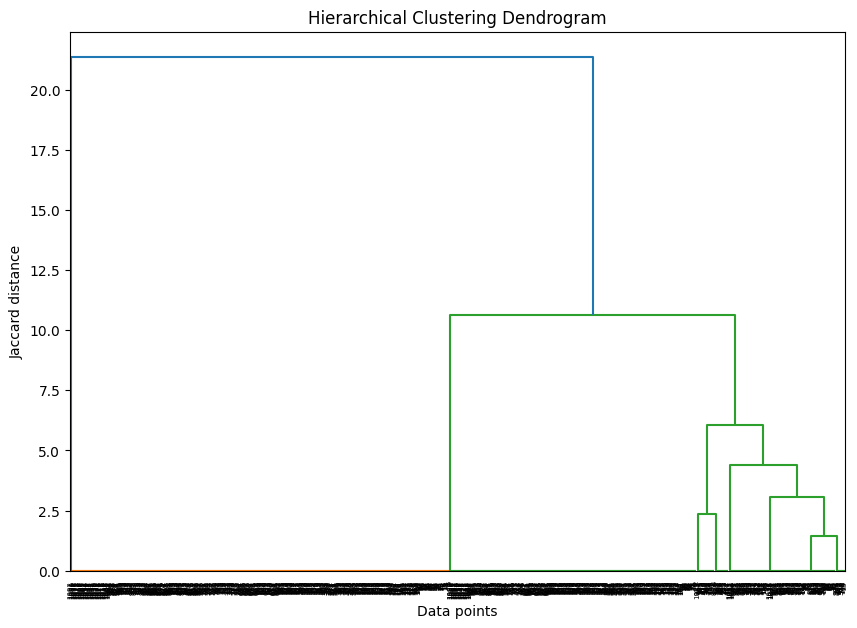

In [107]:
# Plot the dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Jaccard distance')
plt.show()


**Analyzing the Dendrogram**

The dendrogram shows how each cluster is linked, with the y-axis representing the distance (dissimilarity) at which clusters are merged. The height of the merge point indicates the similarity between clusters: lower heights suggest greater similarity.

**Visualizing the Clusters**

Let's visualize the clusters formed based on the selected binary risk tags.

In [109]:
# Set maximum distance at 1.5 for cluster formation
cluster_labels = fcluster(linkage_matrix, t=5, criterion='distance')

# Add cluster labels back to your original DataFrame
data_new['cluster'] = cluster_labels

# Summary statistics for each cluster
cluster_summary = data_new[[feature_1, feature_2, feature_3,'cluster']].groupby('cluster').agg(['mean', 'std', 'median', 'count'])
cluster_summary

hidden_owner                   Is_honeypot                         \
                mean  std median count        mean       std median count   
cluster                                                                     
1                0.0  0.0    0.0   535     0.00000  0.000000    0.0   535   
2                0.0  0.0    0.0   349     0.00000  0.000000    0.0   349   
3                0.0  0.0    0.0    45     1.00000  0.000000    1.0    45   
4                1.0  0.0    1.0   164     0.29878  0.459125    0.0   164   

        exploitation                         
                mean       std median count  
cluster                                      
1           0.000000  0.000000    0.0   535  
2           1.000000  0.000000    1.0   349  
3           0.555556  0.502519    1.0    45  
4           0.573171  0.496132    1.0   164

Plotting histogram of cluster labels to see distribution of cluster sizes

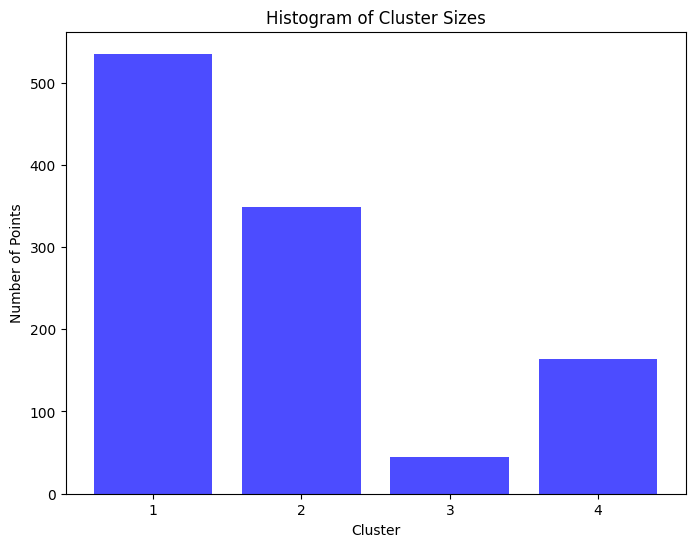

In [110]:
# Plot histogram of cluster labels to see distribution of cluster sizes
plt.figure(figsize=(8, 6))
plt.hist(cluster_labels, bins=np.arange(1, np.max(cluster_labels)+2)-0.5, rwidth=0.8, color='blue', alpha=0.7)
plt.title('Histogram of Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.xticks(np.arange(1, np.max(cluster_labels)+1))
plt.show()

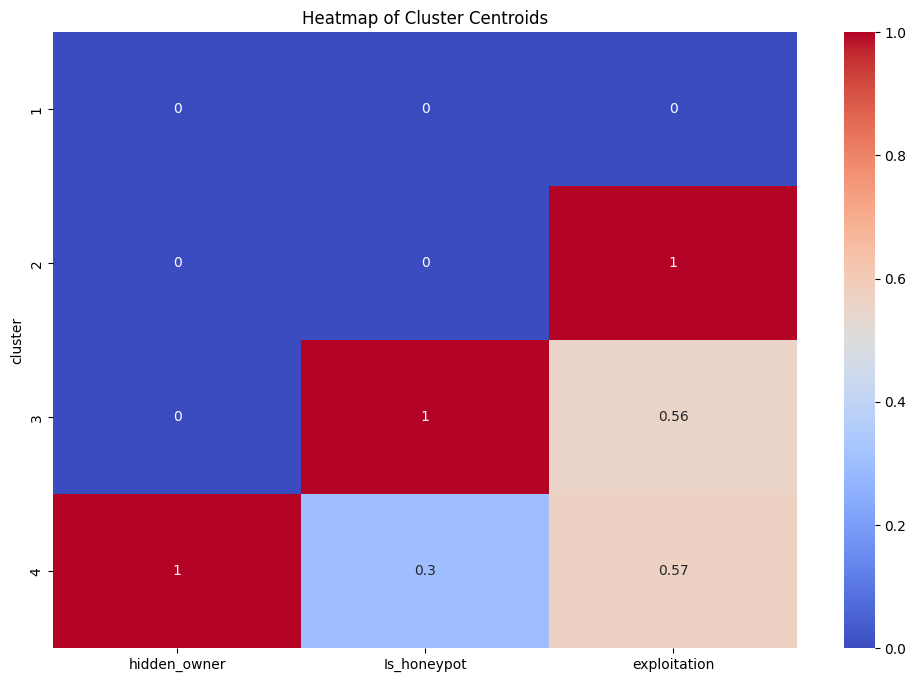

In [111]:
# Calculate the mean for each cluster and feature
cluster_centers = data_new[[feature_1, feature_2, feature_3,'cluster']].groupby('cluster').mean()

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centers, annot=True, cmap='coolwarm')
plt.title('Heatmap of Cluster Centroids')
plt.show()

**Selecting another 3 Features for Cluster Analysis**

feature_1 = 'anti_whale_modifiable'

feature_2 = 'slippage_modifiable'

feature_3 = 'is_airdrop_scam'

In [112]:
data_new = data_set.copy()

# Assuming the dataset has multiple features, we select a few relevant ones
feature_1 = 'anti_whale_modifiable'
feature_2 = 'slippage_modifiable'
feature_3 = 'is_airdrop_scam'
selected_features = data_set[[feature_1, feature_2,feature_3]].replace({True:1, False:0})
print("Features selected for clustering:")

print(selected_features.head())

Features selected for clustering:
   anti_whale_modifiable  slippage_modifiable  is_airdrop_scam
0                      0                    0                0
1                      1                    0                0
2                      0                    1                0
3                      0                    0                1
4                      1                    0                0


Applying Clustering, Jaccard Distance

In [114]:
from scipy.spatial.distance import pdist, squareform

# Assuming 'selected_features' is your DataFrame with binary data
distance_matrix = pdist(selected_features, 'jaccard')
distance_square_matrix = squareform(distance_matrix)  # Convert to square matrix

**Performing Hierarchical Clustering**



In [115]:
import scipy.cluster.hierarchy as sch

# Create linkage matrix
linkage_matrix = sch.linkage(distance_matrix, method='ward')

**Linkage Matrix**

In [116]:
linkage_matrix

array([[0.00000000e+00, 9.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 4.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 5.50000000e+01, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.42300000e+03, 2.18100000e+03, 4.58184763e+00, 1.51000000e+02],
       [2.07500000e+03, 2.18200000e+03, 5.44345345e+00, 2.01000000e+02],
       [2.17700000e+03, 2.18300000e+03, 1.62410337e+01, 1.09300000e+03]])

**Plotting the Dendrogram**

Visualize the clustering as a dendrogram, which will help us understand the data's hierarchical structure.

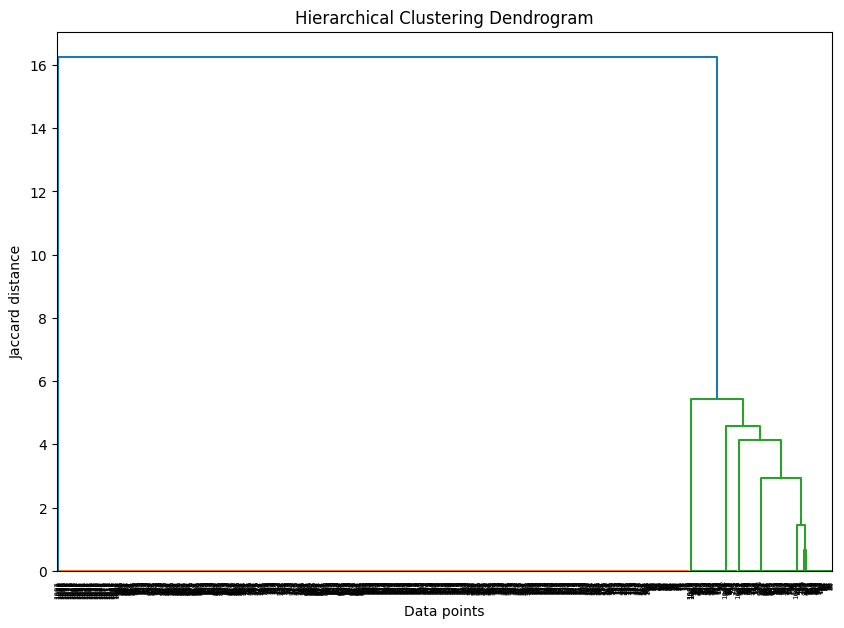

In [117]:
# Plot the dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Jaccard distance')
plt.show()

**Visualizing the Clusters**

Let's visualize the clusters formed based on the selected binary risk tags.

In [119]:
# Set maximum distance at 1.5 for cluster formation
cluster_labels = fcluster(linkage_matrix, t=5, criterion='distance')

# Add cluster labels back to your original DataFrame
data_new['cluster'] = cluster_labels

# Summary statistics for each cluster
cluster_summary = data_new[[feature_1, feature_2, feature_3,'cluster']].groupby('cluster').agg(['mean', 'std', 'median', 'count'])
cluster_summary

anti_whale_modifiable                        slippage_modifiable  \
                         mean       std median count                mean   
cluster                                                                    
1                    0.000000  0.000000    0.0   892            0.000000   
2                    0.000000  0.000000    0.0    50            1.000000   
3                    0.807947  0.395225    1.0   151            0.655629   

                               is_airdrop_scam                         
              std median count            mean       std median count  
cluster                                                                
1        0.000000    0.0   892        0.000000  0.000000    0.0   892  
2        0.000000    1.0    50        0.000000  0.000000    0.0    50  
3        0.476744    1.0   151        0.456954  0.499801    0.0   151

Plotting Histogram of Cluster lables

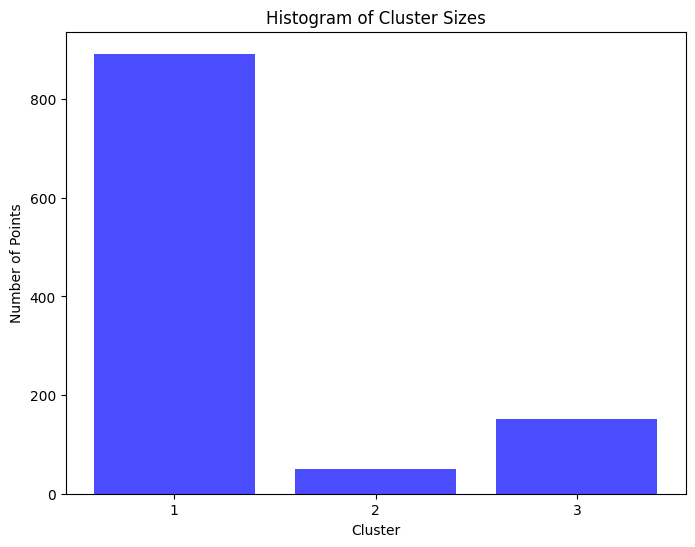

In [121]:
# Plot histogram of cluster labels to see distribution of cluster sizes
plt.figure(figsize=(8, 6))
plt.hist(cluster_labels, bins=np.arange(1, np.max(cluster_labels)+2)-0.5, rwidth=0.8, color='blue', alpha=0.7)
plt.title('Histogram of Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.xticks(np.arange(1, np.max(cluster_labels)+1))
plt.show()

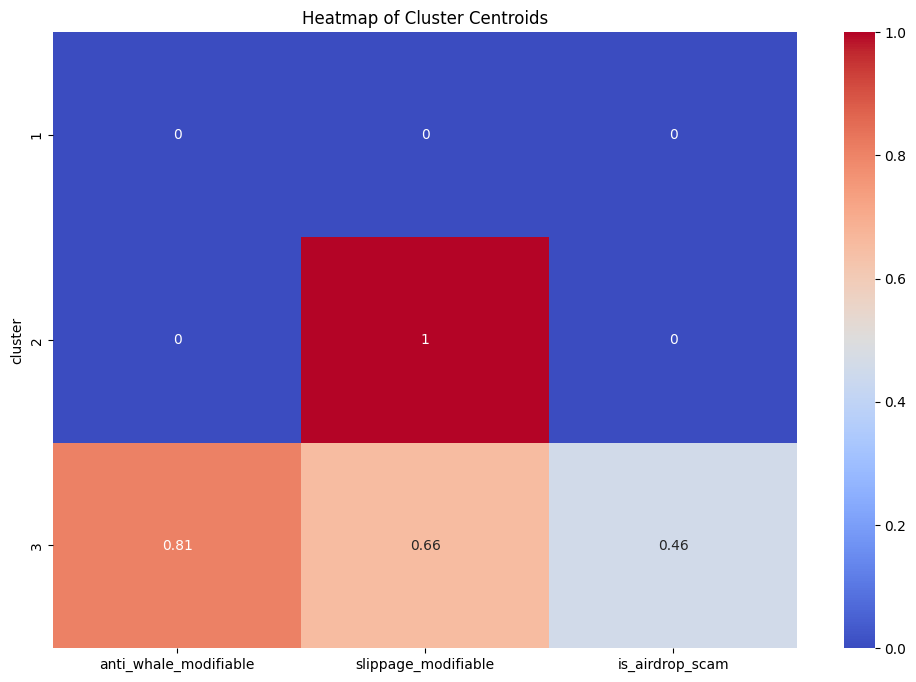

In [122]:
# Calculate the mean for each cluster and feature
cluster_centers = data_new[[feature_1, feature_2, feature_3,'cluster']].groupby('cluster').mean()

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centers, annot=True, cmap='coolwarm')
plt.title('Heatmap of Cluster Centroids')
plt.show()

**Selecting another 3 Features for Cluster Analysis**

feature_1 = 'anti_whale_modifiable'

feature_2 = 'slippage_modifiable'

feature_3 = 'is_airdrop_scam'

In [123]:
data_new = data_set.copy()

# Assuming the dataset has multiple features, we select a few relevant ones
feature_1 = 'encode_packed_collision'
feature_2 = 'is_fake_token'
feature_3 = 'is_airdrop_scam'
selected_features = data_set[[feature_1, feature_2,feature_3]].replace({True:1, False:0})
print("Features selected for clustering:")

print(selected_features.head())

Features selected for clustering:
   encode_packed_collision  is_fake_token  is_airdrop_scam
0                        0              0                0
1                        1              1                0
2                        1              0                0
3                        1              1                1
4                        0              1                0


**Plotting the Dendrogram**

Visualize the clustering as a dendrogram, which will help us understand the data's hierarchical structure.

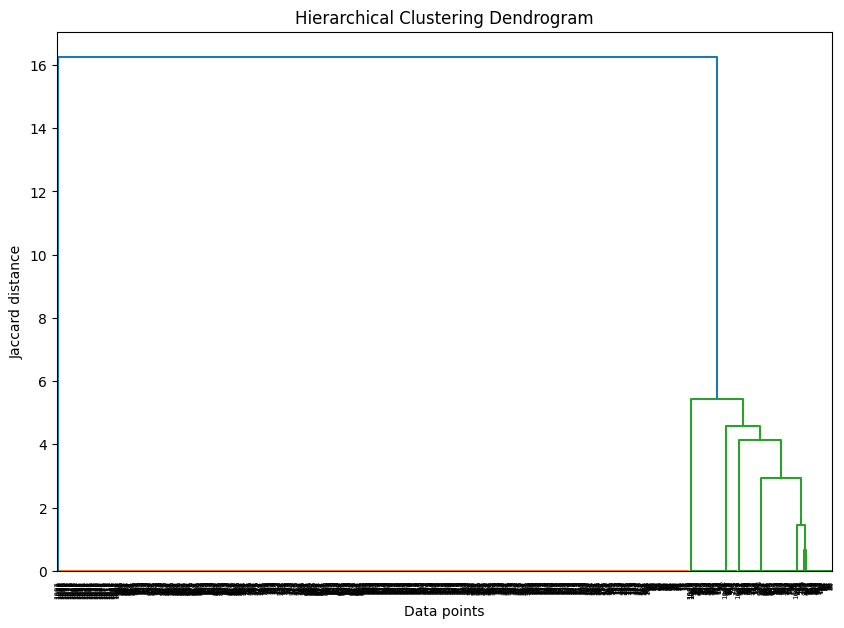

In [125]:
# Plot the dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Jaccard distance')
plt.show()

**Visualizing the Clusters**

Let's visualize the clusters formed based on the selected binary risk tags.

In [126]:
# Set maximum distance at 1.5 for cluster formation
cluster_labels = fcluster(linkage_matrix, t=5, criterion='distance')

# Add cluster labels back to your original DataFrame
data_new['cluster'] = cluster_labels

# Summary statistics for each cluster
cluster_summary = data_new[[feature_1, feature_2, feature_3,'cluster']].groupby('cluster').agg(['mean', 'std', 'median', 'count'])
cluster_summary

encode_packed_collision                        is_fake_token  \
                           mean       std median count          mean   
cluster                                                                
1                      0.014574  0.119907    0.0   892      0.032511   
2                      0.120000  0.328261    0.0    50      0.080000   
3                      0.410596  0.493579    0.0   151      0.377483   

                               is_airdrop_scam                         
              std median count            mean       std median count  
cluster                                                                
1        0.177453    0.0   892        0.000000  0.000000    0.0   892  
2        0.274048    0.0    50        0.000000  0.000000    0.0    50  
3        0.486371    0.0   151        0.456954  0.499801    0.0   151

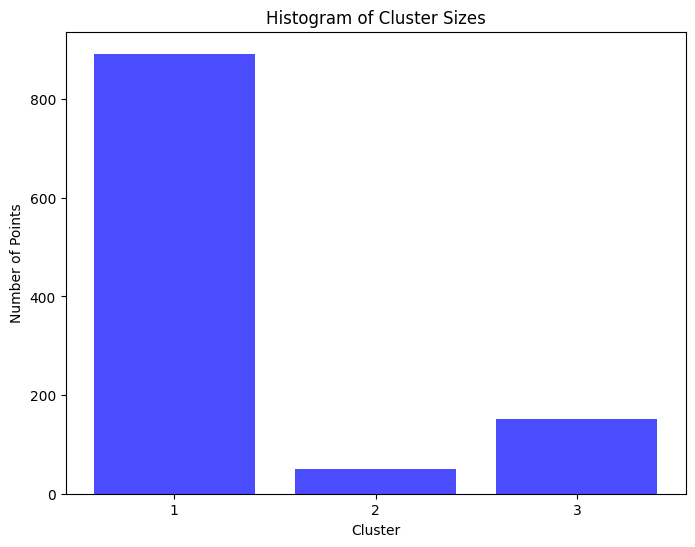

In [127]:
# Plot histogram of cluster labels to see distribution of cluster sizes
plt.figure(figsize=(8, 6))
plt.hist(cluster_labels, bins=np.arange(1, np.max(cluster_labels)+2)-0.5, rwidth=0.8, color='blue', alpha=0.7)
plt.title('Histogram of Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.xticks(np.arange(1, np.max(cluster_labels)+1))
plt.show()

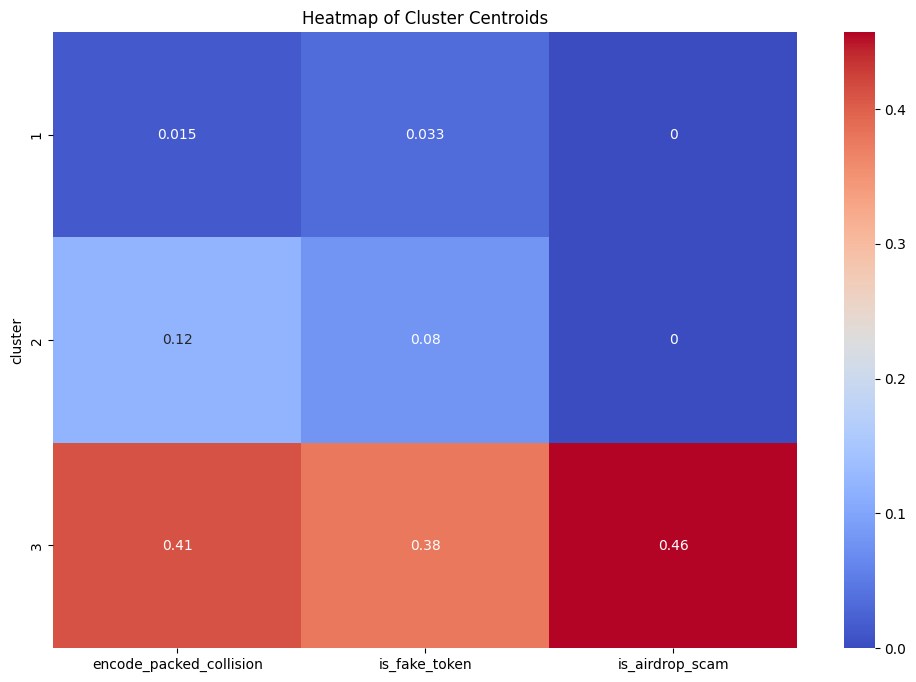

In [128]:
# Calculate the mean for each cluster and feature
cluster_centers = data_new[[feature_1, feature_2, feature_3,'cluster']].groupby('cluster').mean()

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centers, annot=True, cmap='coolwarm')
plt.title('Heatmap of Cluster Centroids')
plt.show()

**Performing Clustering using DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**

 DBSCAN groups points that are closely packed together, marking as outliers points that lie alone in low-density regions. This can be adapted for binary data using appropriate distance metrics.

Loading Data


In [130]:
# Showing the available columns for feature selection

data_set.columns

Index(['project_name', 'Smart contract address', 'Blog post link',
       'Audit website', 'Chain', 'Is_closed_source', 'hidden_owner',
       'anti_whale_modifiable', 'Is_anti_whale', 'Is_honeypot', 'buy_tax',
       'sell_tax', 'slippage_modifiable', 'Is_blacklisted',
       'can_take_back_ownership', 'owner_change_balance', 'is_airdrop_scam',
       'selfdestruct', 'trust_list', 'is_whitelisted', 'is_fake_token',
       'illegal_unicode', 'exploitation', 'bad_contract',
       'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths',
       'Summary/rationale of risk tags marked true'],
      dtype='object')

In [136]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
import pandas as pd

# Select the relevant risk columns
risk_columns = ['Is_closed_source', 'hidden_owner', 'anti_whale_modifiable',
       'Is_anti_whale', 'Is_honeypot', 'buy_tax', 'sell_tax',
       'slippage_modifiable', 'Is_blacklisted', 'can_take_back_ownership',
       'owner_change_balance', 'is_airdrop_scam', 'selfdestruct', 'trust_list',
       'is_whitelisted', 'is_fake_token', 'illegal_unicode', 'exploitation',
       'bad_contract', 'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths']

# Extract the risk data into a NumPy array
risk_data = data_set[risk_columns].values

Ensuring Binary Representation:

Ensuring the values the your risk_data array are binary (0 or 1). As they're currently represented differently (e.g., True/False), convert them accordingly

In [137]:
# Example conversion if values are True/False
risk_data = risk_data.astype(int)

Applying Clustering:

Using the risk_data array as input for clustering algorithms like DBSCAN:

In [138]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
dbscan_labels = dbscan.fit_predict(risk_data)

# Analyze and visualize the clusters
# ...

Visualization (using scatter plot with dimensionality reduction):

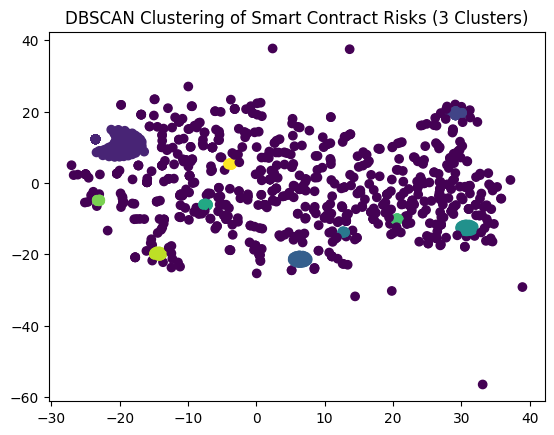

In [142]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

# Adjust DBSCAN parameters to target 3 clusters
eps = 0.8  # Increase eps to merge smaller clusters
min_samples = 10  # You might also need to adjust min_samples

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(risk_data)

# Reduce dimensionality for visualization
tsne = TSNE(n_components=2)
risk_data_2d = tsne.fit_transform(risk_data)

# Plot the clusters with adjusted labels
plt.scatter(risk_data_2d[:, 0], risk_data_2d[:, 1], c=dbscan_labels)
plt.title("DBSCAN Clustering of Smart Contract Risks (3 Clusters)")
plt.show()

Visualization Using Heatmap

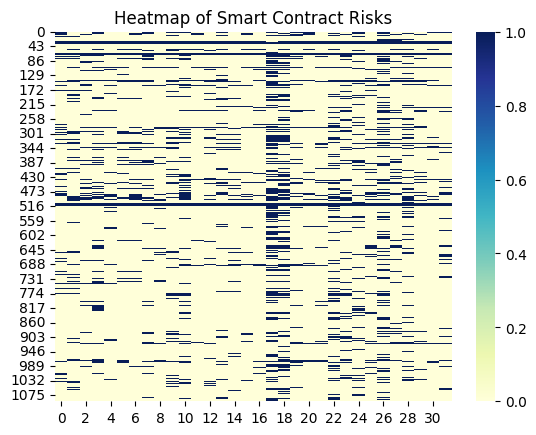

In [141]:
import seaborn as sns

# Assuming 'risk_data' is a DataFrame where rows are contracts and columns are risks
sns.heatmap(risk_data, cmap="YlGnBu")
plt.title("Heatmap of Smart Contract Risks")
plt.show()